# Линейная регрессия


Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline



Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где у - целевая переменная (что мы хотим предсказать), $x_i$ -- признак объекта х, $w_i$ -- вес i-го признака, b -- bias (смещение, свободный член)

Часто предполагают, что объект х содержит в себе фиктивный признак, который всегда равен 1, тогда bias это есть вес этого признака. В этом случае формула принимает простой вид:
$$ y = <w, x>. $$

В матричной форме, в случае, когда у нас есть n объектов формулу можно переписать следующим образом:
$$ Y = Xw,$$
Y -- вектор размера n, X -- матрица, содержащая объекты-признаки размера $n \times k$, w -- вектор весов размера k.

Решение по методу наименьших квадратов дает
$$ w = (X^TX)^{-1}X^TY $$

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import mean_absolute_error

#  датасет

 Будем работать с датасетом, который описывает средние цены на недвижимость в районах Калифорнии в $1000.
Примеры признаков города: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.


Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import fetch_california_housing


In [ ]:
house_data =  fetch_california_housing()

In [ ]:
X0 = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

In [ ]:
X0.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Визуализируем распределения признаков в датасете

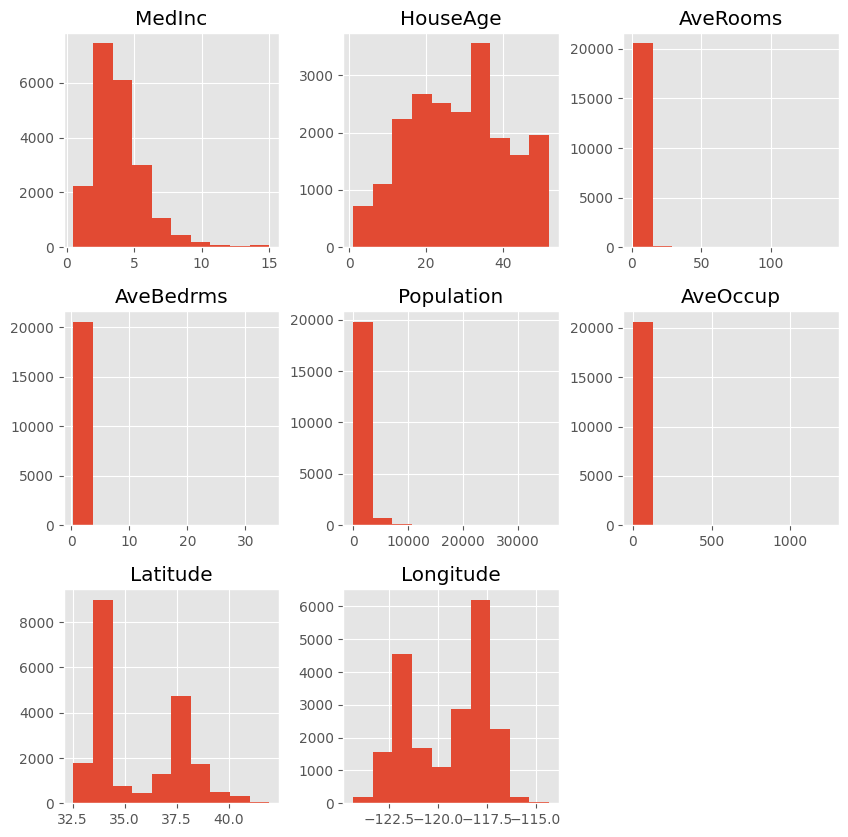

In [ ]:
_ =X0.hist(X0.columns, figsize=(10, 10))

Посмотрим на то, как скоррелированы данные

<Axes: >

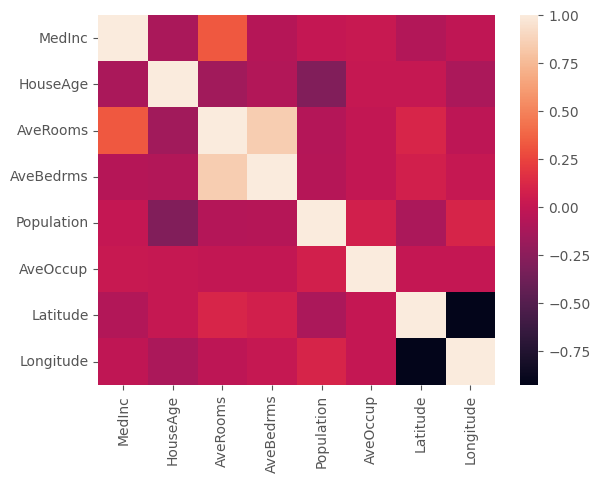

In [ ]:
import seaborn as sns

sns.heatmap(X0.corr())

Сделаем предсказание: какие факторы окажутся наиболее значимыми и в какую сторону?

## Обучение на реальных данных



Выполним нормировку данных

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X= scaler.fit_transform(X0)


Разобьём выборку на train и test в соотношении 70/30.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,random_state=42)

In [ ]:
y_train.shape, y_test.shape

((15480,), (5160,))

Обучим линейную регрессию и подсчитаем её качество на тесте.

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [ ]:
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))

print('Train R^2: ', model.score(X_train,y_train ))
print('Test R^2: ', model.score(X_test,y_test ))

Train MSE:  0.5205522163645129
Test MSE:  0.5411287478470689
Train MAE:  0.5295154304301852
Test MAE:  0.5296964012919461
Train R^2:  0.609873031052925
Test R^2:  0.5910509795491351


Визуализируем получившиеся веса

<BarContainer object of 8 artists>

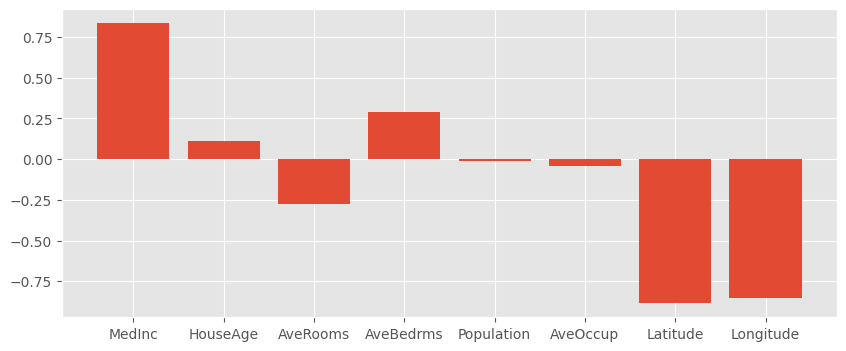

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(X0.columns, model.coef_)

Видим, что точность низкая. Попытаемся решить проблему, добавив полиномиальные признаки


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_polynomial = pf.fit_transform(X)

Сформируем заново обучающую и тестовую выборку

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_polynomial, y, train_size=0.7,random_state=42)

In [ ]:
model.fit(X_train, y_train) #обучаем
print (model.score(X_train,y_train), "обучающая выборка")
print(model.score(X_test,y_test),"тестовая выборка") #проверяем точность

0.6838084691476767 обучающая выборка
0.6533688921710017 тестовая выборка


Для полинома степени 2 точность стала выше (0.65 вместо 0.59). Посмотрим для полинома степени 5 точность на обучающих и тестовых данных

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=5)
X_polynomial = pf.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_polynomial, y, train_size=0.7,random_state=42)
model.fit(X_train, y_train) #обучаем
print (model.score(X_train,y_train), "обучающая выборка")
print(model.score(X_test,y_test),"тестовая выборка") #проверяем точность

0.8284074167869081 обучающая выборка
-26385836.72753984 тестовая выборка


Видим, что точность на обучающей выборке выросла, но на тестовой резко упала

## Ridge & Lasso

Попытаемся исправить проблему переобучения . Замечено, что линейная регрессия переобучается, когда вектор весов имеет очень большие значения. Постараемся избежать этого, прибавив к функции потерь дополнительное слагаемое.

### Ridge regression:
$$L(x, y) = \overline{(<w, x> - y_{true})^2} + \lambda ||w||^2 \rightarrow \min_{w}.$$

### Lasso regression:

$$L(x, y) = \overline{(<w, x> - y_{true})^2} + \lambda ||w|| \rightarrow \min_{w}.$$

In [ ]:
from sklearn.linear_model import Ridge, Lasso

Ridge (L2-регуляризация) сильно штрафует за слишком большие веса и не очень за малые. При увеличении коэффициента перед регуляризатором веса меняются плавно

In [ ]:
lr = Ridge(alpha=0.1)
lr.fit(X_train, y_train)
lr.score(X_test,y_test)  #проверяем точность

0.5910535723524102

Lasso одинаково сильно штрафует малые и большие веса, поэтому при достаточно большом коэффициенте регуляризации многие признаки становятся равными нулю, при этом остаются только наиболее инфромативные. Этот факт можно использовать для решения задачи отбора признаков.

In [ ]:
ls = Lasso(alpha=0.01)
ls.fit(X_train, y_train)
ls.score(X_test,y_test)  #проверяем точность

0.5953111636444399